In [0]:
import argparse
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os
from google.oauth2 import service_account
import json
import pandas as pd
import time
from functools import reduce
import matplotlib.pyplot as plt

In [0]:
cred_file_loc = r'SentimentAnalysis-2950f6ec90b2.json'

In [0]:
cred = service_account.Credentials.from_service_account_file(cred_file_loc)

In [0]:
Client = language.LanguageServiceClient(credentials=cred)

In [5]:
with open('cleanedDataset.json') as f:
    json_1 = json.load(f)
dict_1 = dict(json_1)
df_1 = pd.DataFrame.from_dict(dict_1)
df_1.head()

,sentiment,text
0,Positive,"Thank you, Ellen. We have a strong 2018, with ..."
1,Positive,Stock-based compensation totaled $2.3 billion....
10,Neutral,"Ladies and gentlemen, this does conclude the G..."
100,Positive,"And that has thrown up, as I said in my commen..."
1000,Neutral,"For S and X, we did eliminate the 75 [indiscer..."


In [0]:
final_df = df_1.reset_index()

In [0]:
final_df = final_df.drop('index',axis=1)

In [0]:
x = final_df['text']

In [0]:
cleaned_text = [w.lower() for w in x] #converting all text to lowercase

In [0]:
results = []
for paragrph in cleaned_text:

    document = types.Document(content=paragrph, type=enums.Document.Type.PLAIN_TEXT)
    result =Client.analyze_sentiment(document=document)
    
    results.append(result)

In [0]:
score_store = []
for i in results:
    score = i.document_sentiment.score
    score_store.append(score)

In [0]:
magnitude_store = []
for i in results:
    magnitude = i.document_sentiment.magnitude
    magnitude_store.append(magnitude)

In [0]:
df_1['magnitude'] = magnitude_store

In [0]:
df_1['score'] = score_store

In [0]:
df_1.to_csv('Google_API_Results.csv')

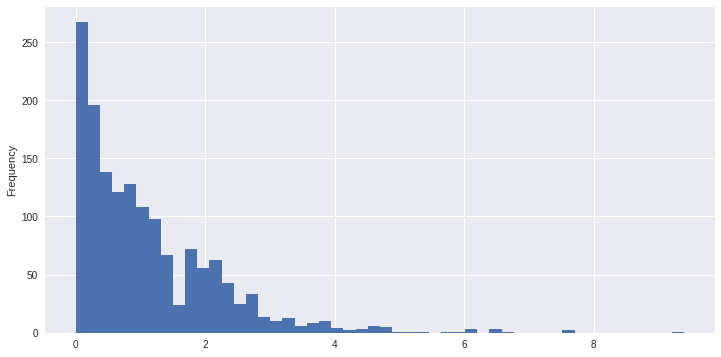

In [16]:
df_1['magnitude'].plot(kind='hist',bins=50, figsize=(12,6))
plt.show()

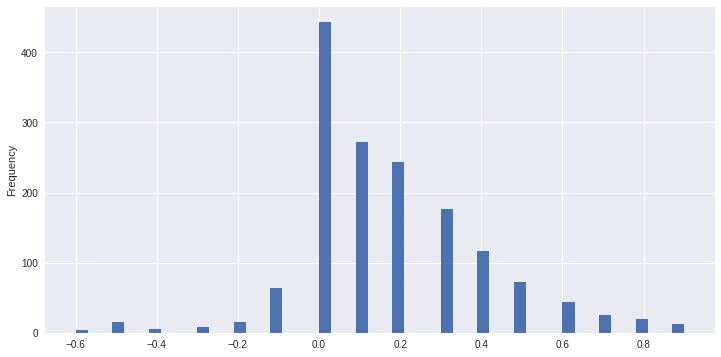

In [17]:
df_1['score'].plot(kind='hist',bins=50, figsize=(12,6))
plt.show()

In [0]:
def Average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst)

In [19]:
overall_socre = Average(score_store) 
print("Overall sentiment score of all the documents =", round(overall_socre, 2))

Overall sentiment score of all the documents = 0.17


In [20]:
overall_magnitude = Average(magnitude_store) 
print("Overall Magnitude of all the documents is =", round(overall_magnitude, 2))

Overall Magnitude of all the documents is = 1.1


In [0]:
for s in
if s > (1/3):
        return 'positive'
    elif s < (-1/3):
        return 'negative'
    else:
        return 'neutral' 